# Loan Prediction Problem

A Finance company wants to automate the loan eligibility process based on the customer details provided while filling application form. These details are Gender,Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.



# Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data

In [ ]:
path = '/content/drive/MyDrive/Formación/Bootcamp - Geekshub - Machine Learning/'

In [ ]:
train = pd.read_csv(path+'train_loans_kaggle.csv')
test = pd.read_csv(path+'test_loans_kaggle.csv')

In [ ]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Visualizations

In [ ]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

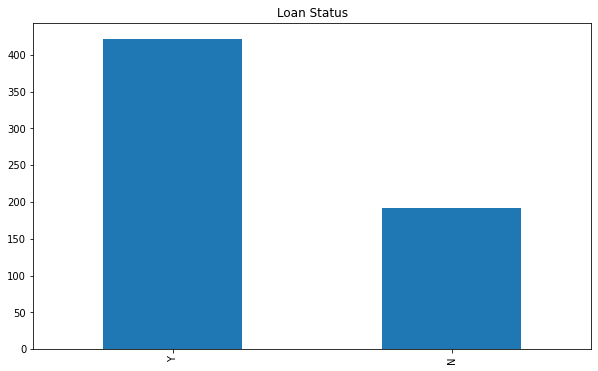

In [ ]:
train['Loan_Status'].value_counts().plot.bar(figsize=(10,6), title='Loan Status')

The loan of 422 (around 69%) people out of 614 was approved.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


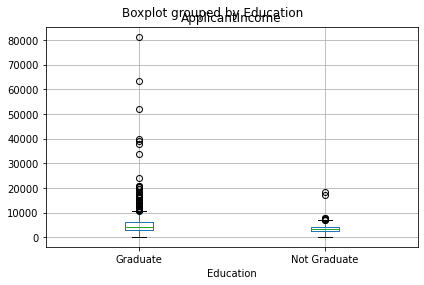

In [ ]:
train.boxplot(column= 'ApplicantIncome', by='Education')
plt.tight_layout()

# Cleaning data

## Tratamiento de nulos del dataset de train

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We impute missing values with mean, mode, median.

In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Tratamiento de nulos del dataset de test

In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [ ]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Modeling - Loan Status

In [ ]:
X = train.drop(['Loan_Status','Loan_ID'], 1)
y = train['Loan_Status']

<ipython-input-15-154900fe9a4e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = train.drop(['Loan_Status','Loan_ID'], 1)


In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [ ]:
X = pd.get_dummies(X)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,0,0,1,0,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_0', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [ ]:
y_train

456    Y
416    N
188    Y
179    N
241    N
      ..
277    Y
439    Y
281    Y
187    Y
573    N
Name: Loan_Status, Length: 429, dtype: object

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
predictions_train = model.predict(X_train)
predictions = model.predict(X_cv)

In [ ]:
print(classification_report(y_train, predictions_train))
print(accuracy_score(y_train, predictions_train))

              precision    recall  f1-score   support

           N       1.00      1.00      1.00       136
           Y       1.00      1.00      1.00       293

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429

1.0


In [ ]:
print(classification_report(y_cv, predictions))
print(accuracy_score(y_cv, predictions))

              precision    recall  f1-score   support

           N       0.54      0.62      0.58        56
           Y       0.82      0.77      0.80       129

    accuracy                           0.72       185
   macro avg       0.68      0.70      0.69       185
weighted avg       0.74      0.72      0.73       185

0.7243243243243244


In [ ]:
from sklearn import tree

# Model representation 
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_0 <= 4316.50
|   |   |--- class: N
|   |--- feature_0 >  4316.50
|   |   |--- feature_0 <= 4958.50
|   |   |   |--- feature_19 <= 0.50
|   |   |   |   |--- class: Y
|   |   |   |--- feature_19 >  0.50
|   |   |   |   |--- class: N
|   |   |--- feature_0 >  4958.50
|   |   |   |--- feature_14 <= 0.50
|   |   |   |   |--- class: N
|   |   |   |--- feature_14 >  0.50
|   |   |   |   |--- feature_0 <= 5690.50
|   |   |   |   |   |--- class: Y
|   |   |   |   |--- feature_0 >  5690.50
|   |   |   |   |   |--- class: N
|--- feature_4 >  0.50
|   |--- feature_3 <= 48.00
|   |   |--- class: N
|   |--- feature_3 >  48.00
|   |   |--- feature_18 <= 0.50
|   |   |   |--- feature_0 <= 1149.50
|   |   |   |   |--- class: N
|   |   |   |--- feature_0 >  1149.50
|   |   |   |   |--- feature_0 <= 3562.00
|   |   |   |   |   |--- feature_2 <= 13.00
|   |   |   |   |   |   |--- class: N
|   |   |   |   |   |--- feature_2 >  13.00
|   |   |   |   |   |   |--- featu

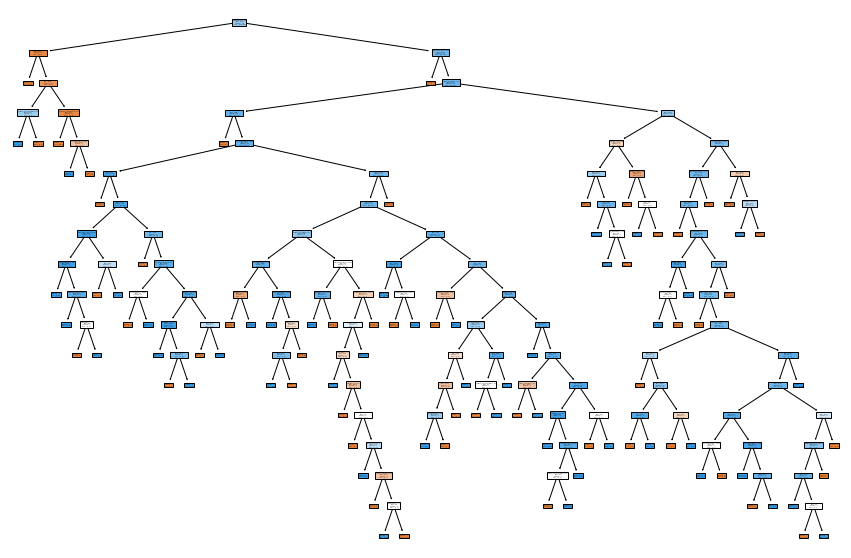

In [ ]:
# Print Decision Tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model, 
                   feature_names=X_train.columns,  
                   filled=True)

<BarContainer object of 21 artists>

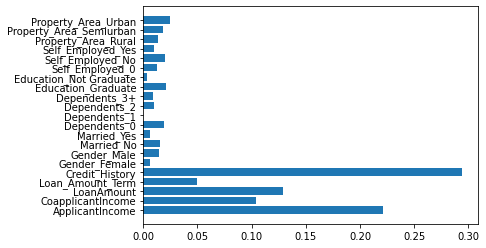

In [ ]:
# Feature importance
plt.barh(model.feature_names_in_, model.feature_importances_)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfmodel = RandomForestClassifier(n_estimators=500)
rfmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
rfpredictions = rfmodel.predict(X_cv)
rfpredictions_train = rfmodel.predict(X_train)

In [ ]:
print(classification_report(y_train, rfpredictions_train))
print(accuracy_score(y_train, rfpredictions_train))

              precision    recall  f1-score   support

           N       1.00      1.00      1.00       136
           Y       1.00      1.00      1.00       293

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429

1.0


In [ ]:
print(classification_report(y_cv, rfpredictions))
print(accuracy_score(y_cv, rfpredictions))

              precision    recall  f1-score   support

           N       0.64      0.48      0.55        56
           Y       0.80      0.88      0.84       129

    accuracy                           0.76       185
   macro avg       0.72      0.68      0.69       185
weighted avg       0.75      0.76      0.75       185

0.7621621621621621


In [ ]:
rfmodel.feature_importances_

array([0.18246024, 0.10358155, 0.17212688, 0.04672914, 0.23905129,
       0.01276945, 0.01136024, 0.01615101, 0.01666588, 0.02059222,
       0.02013464, 0.01571997, 0.01218259, 0.01552975, 0.01517211,
       0.00813062, 0.01644949, 0.01369893, 0.02222595, 0.02271028,
       0.01655775])

<BarContainer object of 21 artists>

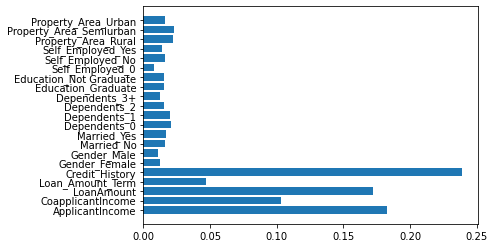

In [ ]:
# Feature importance
plt.barh(X_train.columns, rfmodel.feature_importances_)

# Model - Loan amount

In [ ]:
X = train.drop(['Loan_Status','Loan_ID','LoanAmount','Loan_Amount_Term'], 1)
y = train['LoanAmount']

<ipython-input-36-e0c3d961b1d2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = train.drop(['Loan_Status','Loan_ID','LoanAmount','Loan_Amount_Term'], 1)


In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,1.0,Urban


In [ ]:
X = pd.get_dummies(X)
X.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,1.0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1
1,4583,1508.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0
2,3000,0.0,1.0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1
3,2583,2358.0,1.0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1
4,6000,0.0,1.0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1


## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

In [ ]:
regressor = DecisionTreeRegressor(random_state=0, max_depth=5)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [ ]:
predictions_train = regressor.predict(X_train)
predictions = regressor.predict(X_cv)

In [ ]:
# Importancia de las variables
pd.DataFrame(regressor.feature_names_in_, regressor.feature_importances_)

,0
0.773504,ApplicantIncome
0.167866,CoapplicantIncome
0.005789,Credit_History
0.000000,Gender_Female
0.000000,Gender_Male
0.000000,Married_No
0.000000,Married_Yes
0.000000,Dependents_0
0.003205,Dependents_1
0.008579,Dependents_2


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Model Evaluation
# Train data

print('MAE:',mean_absolute_error(y_train, predictions_train))
print('MSE:',mean_squared_error(y_train, predictions_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, predictions_train)))
print('R^2: ',regressor.score(X_train,y_train))

MAE: 27.603529279314994
MSE: 1487.970136751093
RMSE: 38.57421595769761
R^2:  0.7667259885089397


In [ ]:
# Model Evaluation
# Test data

print('MAE:',mean_absolute_error(y_cv, predictions))
print('MSE:',mean_squared_error(y_cv, predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_cv, predictions)))
print('R^2: ',regressor.score(X_cv,y_cv))

MAE: 45.25014126471405
MSE: 5993.008456826814
RMSE: 77.41452355228193
R^2:  0.3040870133002086


In [ ]:
# Model representation 
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_0 <= 7727.00
|   |--- feature_1 <= 2992.50
|   |   |--- feature_0 <= 5658.00
|   |   |   |--- feature_1 <= 1427.50
|   |   |   |   |--- feature_0 <= 3245.00
|   |   |   |   |   |--- value: [85.43]
|   |   |   |   |--- feature_0 >  3245.00
|   |   |   |   |   |--- value: [109.54]
|   |   |   |--- feature_1 >  1427.50
|   |   |   |   |--- feature_0 <= 2412.50
|   |   |   |   |   |--- value: [105.32]
|   |   |   |   |--- feature_0 >  2412.50
|   |   |   |   |   |--- value: [130.49]
|   |   |--- feature_0 >  5658.00
|   |   |   |--- feature_1 <= 1681.00
|   |   |   |   |--- feature_0 <= 5790.00
|   |   |   |   |   |--- value: [192.33]
|   |   |   |   |--- feature_0 >  5790.00
|   |   |   |   |   |--- value: [145.34]
|   |   |   |--- feature_1 >  1681.00
|   |   |   |   |--- feature_0 <= 5961.50
|   |   |   |   |   |--- value: [195.50]
|   |   |   |   |--- feature_0 >  5961.50
|   |   |   |   |   |--- value: [238.75]
|   |--- feature_1 >  2992.50
|   |   |--- feature_0 <= 6066.

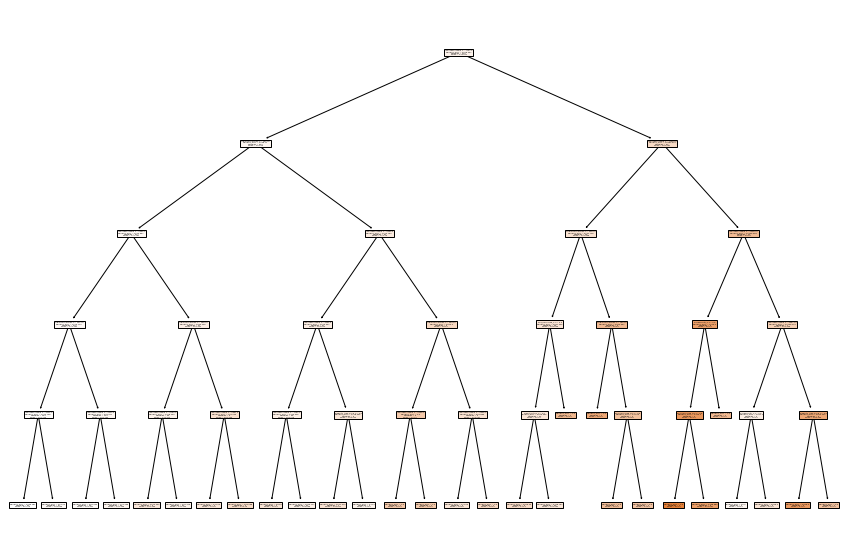

In [ ]:
# Print Decision Tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(regressor, 
                   feature_names=X_train.columns,  
                   filled=True)

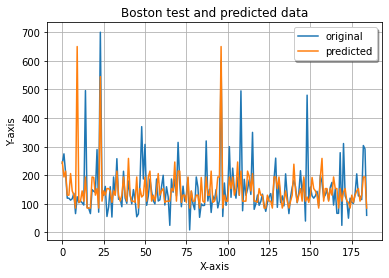

In [ ]:
x_ax = range(len(y_cv))
plt.plot(x_ax, y_cv, label="original")
plt.plot(x_ax, predictions, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 